In [1]:
from __future__ import print_function
%matplotlib inline

import os

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
from pandas_summary import DataFrameSummary

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

import spacy
import en_core_web_sm
import unicodedata

import re
import string

PROJ_ROOT = os.path.join(os.pardir, os.pardir)

In [2]:
nlp = en_core_web_sm.load()

In [3]:
path = '/Users/teresiahkahura/Desktop/ds/SB-Capstone2/data/processed/reviews5.pkl'
df = pd.read_pickle(path)

assert df.shape == (3268, 2)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
#vectorizing text, removing stop words and words that are in over 50 % of corpus
#extracting unigrams up to trigrams
def make_features(df, vectorizer=None):  
    if vectorizer is None:
        vectorizer = CountVectorizer(stop_words = 'english', max_df=0.5, ngram_range=(1, 3))
    x = vectorizer.fit_transform(df['text'])
    y = df['label']
    return x, y

x, y = make_features(df)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

clf = BernoulliNB()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.781855249745158

Text(91.68, 0.5, 'true label')

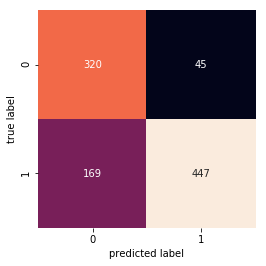

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75       489
           1       0.73      0.91      0.81       492

   micro avg       0.78      0.78      0.78       981
   macro avg       0.80      0.78      0.78       981
weighted avg       0.80      0.78      0.78       981



Text(0.5, 0.2, 'AUC: 0.78')

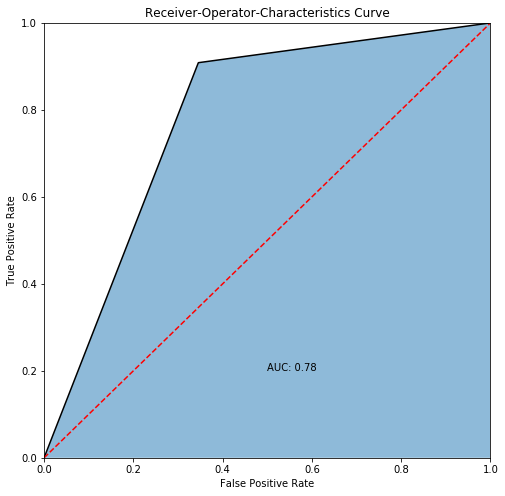

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
fig,(ax1) = plt.subplots(1,1,figsize=(8,8))

ax1.plot(fpr, tpr, 'k-')
ax1.plot([0, 1], [0, 1], 'r--')
ax1.fill_between(fpr, tpr, alpha =0.5)
ax1.axis([0,1,0,1])

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver-Operator-Characteristics Curve')
roc_score = roc_auc_score(y_test, y_pred)
ax1.text(0.5, 0.2, 'AUC: {}'.format(np.round(roc_score,2)))

Naive Bayes classifiers are very good generalists so there are few if any hyperparameters to optimize their performance. The model had more false negatives (Type II Error) compared to false positives (Type I Error). The model had a higher percentage of correctly predicted positive predictions for the negative class compared to the positive class. In comparison, the recall for positive cases was higher for the positive class versus the negative class. Since our dataset is very small, this might signal the need to train the model on more reviews in order for the model to minimize false negatives.